# Lab 3


## Problem 1: Ridge Regression and Co-linearity

In [0]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
sns.set(style='ticks', palette='Set2')
%matplotlib inline

In [0]:
# correlated columns
# Suppose p = 5, n = 500 -- a good ratio
p = 5; n = 500
X = np.random.randn(n,p)
c = np.dot(X[:,0:p-1],[2,3,-1,0.5]) + np.random.randn(1,n)/1000;
# c is a column that is approximately a linear combination of
# columns 1, 2, 3 and 4. We set the 5th column of X equal to c
X[:,p-1] = c
beta = np.array([1,1,1,1,0])
sigma = 0.33
y = np.dot(X,beta) + sigma*np.random.randn(n)
# Now let's also generate a test data set
n1 = 500 # number of testing points
X_test = np.random.randn(n1,p)
c_test = np.dot(X_test[:,0:p-1],[2,3,0,0.5]) + np.random.randn(1,n1)/1000;
X_test[:,p-1] = c_test
y_test = np.dot(X_test,beta) + sigma*np.random.randn(n1)

In [0]:
# Note that the matrix Z = X'X has a very small eigenvalue.
Z = np.dot(X.T,X)
np.linalg.eig(Z)[0]

array([7.57599170e+03, 3.07555043e-05, 5.19260953e+02, 4.43074226e+02,
       4.66616666e+02])

In [0]:
# That means that its inverse has some very big eigenvalues.
# In fact, recall that the eigenvalues of the inverse matrix
# are always the inverse (one over) the eigenvalues of the original
# matrix.
np.linalg.eig(np.linalg.inv(Z))[0]

array([3.25145049e+04, 1.31995921e-04, 2.25695819e-03, 2.14308677e-03,
       1.92581398e-03])

In [0]:
# And remember that the formula for beta is
# beta_hat = (X'X)^-1 X'y
# and if we plug in: y = X beta* + Noise 
# (where beta* is the true solution), we get
# beta_hat = beta* + (X'X)^-1 X' Noise
#
# Multiplying the noise by (X'X)^-1 has the potential to blow up the noise
# and this is exactly what happens.

beta_hat = np.dot(np.dot(np.linalg.inv(Z),X.T),y.T)
print(beta_hat)

[-0.36408915 -1.02088262  1.656919    0.62913553  0.67507608]


In [0]:
# Now let's compute the test error of OLS.
# You can see that it's not that good (it's big).
np.linalg.norm(np.dot(X_test,beta_hat) - y_test) 

16.714179449956287

In [0]:
## 2
zeros_soln = np.zeros(len(beta_hat))
np.linalg.norm(np.dot(X_test, zeros_soln) - y_test)

44.57267356468185

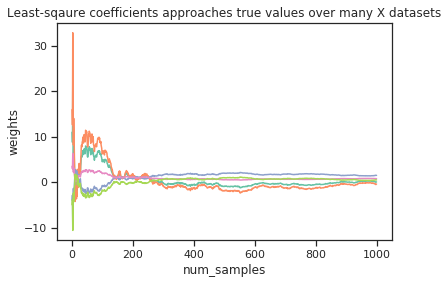

In [0]:
## 3
p = 5; n = 500; num_trials = 1000
beta = np.array([1,1,1,1,0])

beta_hats = []
mean_beta_hats = []
num_trials = 1000
for i in range(num_trials):
    X = np.random.randn(n,p)
    c = np.dot(X[:,0:p-1],[2,3,-1,0.5]) + np.random.randn(1,n)/1000;
    # c is a column that is approximately a linear combination of
    # columns 1, 2, 3 and 4. We set the 5th column of X equal to c
    X[:,p-1] = c
    sigma = 0.33
    y = np.dot(X,beta) + sigma*np.random.randn(n)
    Z = np.matmul(X.T, X)
    beta_hat = np.dot(np.dot(np.linalg.inv(Z),X.T),y)
    # print(beta_hat)
    beta_hats.append(beta_hat)
    # print(np.mean(beta_hats, axis=0))
    # print()
    mean_beta_hats.append(np.mean(beta_hats, axis=0))

n = list(range(1, num_trials+1))

ax = plt.gca()
# ax.set_prop_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax.plot(n, mean_beta_hats)
# ax.set_xscale('log')
plt.xlabel('num_samples')
plt.ylabel('weights')
plt.title('Least-sqaure coefficients approaches true values over many X datasets')
plt.axis('tight')
# plt.ylim((0, 2))
plt.show()

In [0]:
## 4

import time
startTime = time.time()

In [0]:
num_datapoints = 1000000
num_batches = 100
batch_size = num_datapoints / num_batches
num_features = 100
beta = np.array([1] * num_features)

startTime = time.time()
X = np.random.randn(num_datapoints, num_features)
y = np.random.randn(num_datapoints, 1)
beta_hat = np.dot(np.dot(np.linalg.inv(np.matmul(X.T, X)), X.T), y)
print(beta_hat)
endTime = time.time()
print(endTime - startTime, '\n')

startTime = time.time()
beta_b_hats = []
for i in range(num_batches):
  lower = int(batch_size * i)
  upper = int(batch_size * (i + 1))
  X_b = X[lower : upper]
  y_b = y[lower : upper]
  beta_b_hat = np.dot(np.dot(np.linalg.inv(np.matmul(X_b.T, X_b)), X_b.T), y_b)
  beta_b_hats.append(beta_b_hat)

print(np.mean(beta_b_hats, axis=0))
endTime = time.time()
print(endTime - startTime, '\n')

[[-1.35678408e-03]
 [-5.24722700e-05]
 [-1.34354756e-03]
 [-7.78823588e-04]
 [ 7.65513883e-04]
 [ 5.18370612e-04]
 [-1.26070798e-03]
 [-1.55398843e-03]
 [ 6.81808186e-04]
 [-2.72301372e-04]
 [-1.04339721e-03]
 [ 3.25408149e-04]
 [ 1.25101324e-03]
 [ 1.38427567e-03]
 [-3.50300737e-04]
 [-1.10026173e-03]
 [ 1.02490931e-03]
 [-4.25686072e-04]
 [-4.90180252e-04]
 [ 1.76231256e-03]
 [ 2.45586030e-05]
 [ 6.05977634e-04]
 [-4.68380198e-04]
 [-2.09279667e-03]
 [-1.26131777e-03]
 [-2.05352248e-03]
 [ 8.42198536e-04]
 [ 1.76691617e-03]
 [ 1.44449725e-04]
 [ 8.72811281e-06]
 [-1.02388602e-04]
 [-5.56810025e-05]
 [ 4.88721651e-04]
 [-4.22692614e-05]
 [-2.25804932e-03]
 [ 9.32807310e-04]
 [-4.84470254e-05]
 [ 1.51251268e-03]
 [-7.40597212e-04]
 [ 4.81908715e-04]
 [-4.87668421e-04]
 [-1.62275096e-03]
 [ 3.12105988e-04]
 [ 5.23150441e-04]
 [-2.46690205e-04]
 [ 8.73271793e-05]
 [ 4.36125847e-04]
 [ 2.14895884e-03]
 [ 5.58311934e-05]
 [-1.47998022e-03]
 [-7.20272441e-04]
 [ 5.64439337e-05]
 [-6.2123513

## Problem 2: Starting in Kaggle

1) Done.

2) RMSE = 0.13029

3) With a single regression model, we found a score of: 0.12224. With a single lasso model, we found a score of: 0.12105.

4) Next cell.

5) RMSE = 0.12161

9) Done.

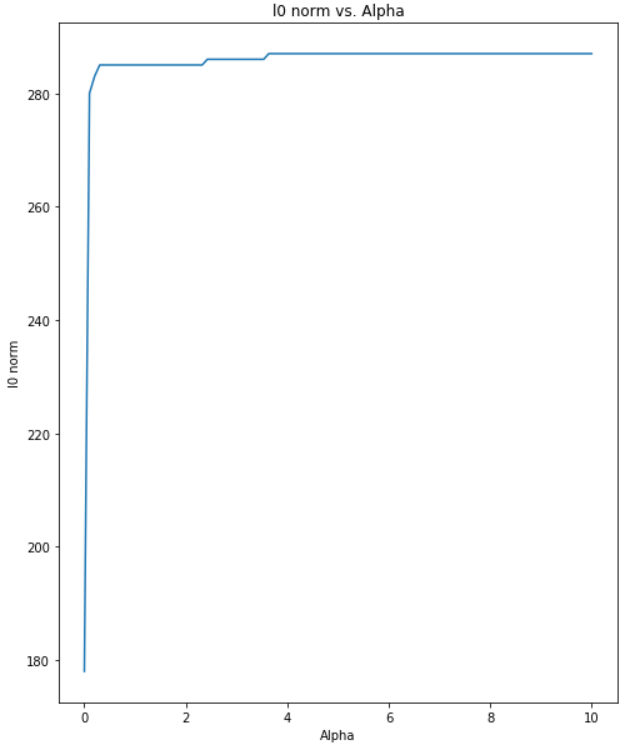

In [0]:
from PIL import Image
from IPython.display import display
im = Image.open("l0normvsalpha.png")
display(im)